IMPORTING REQUIRED LIBRARIES

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import joblib
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional, GRU, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers

Reading the csv files

In [30]:
df = pd.read_csv ('/content/drive/MyDrive/Invistico_Airline.csv')
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


Data Pre-processing

In [31]:
df.shape

(129880, 23)

In [32]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [33]:
df = df.fillna(value = df['Arrival Delay in Minutes'].mean())

In [34]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [35]:
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["satisfaction"] = le.fit_transform(df["satisfaction"])
df["Gender"] = le.fit_transform(df["Gender"])
df["Customer Type"] = le.fit_transform(df["Customer Type"])
df["Type of Travel"] = le.fit_transform(df["Type of Travel"])
df["Class"] = le.fit_transform(df["Class"])
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,1,63,1,0,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,1,69,1,1,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,1,66,1,1,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [37]:
df.dtypes

satisfaction                           int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

Correlations between features

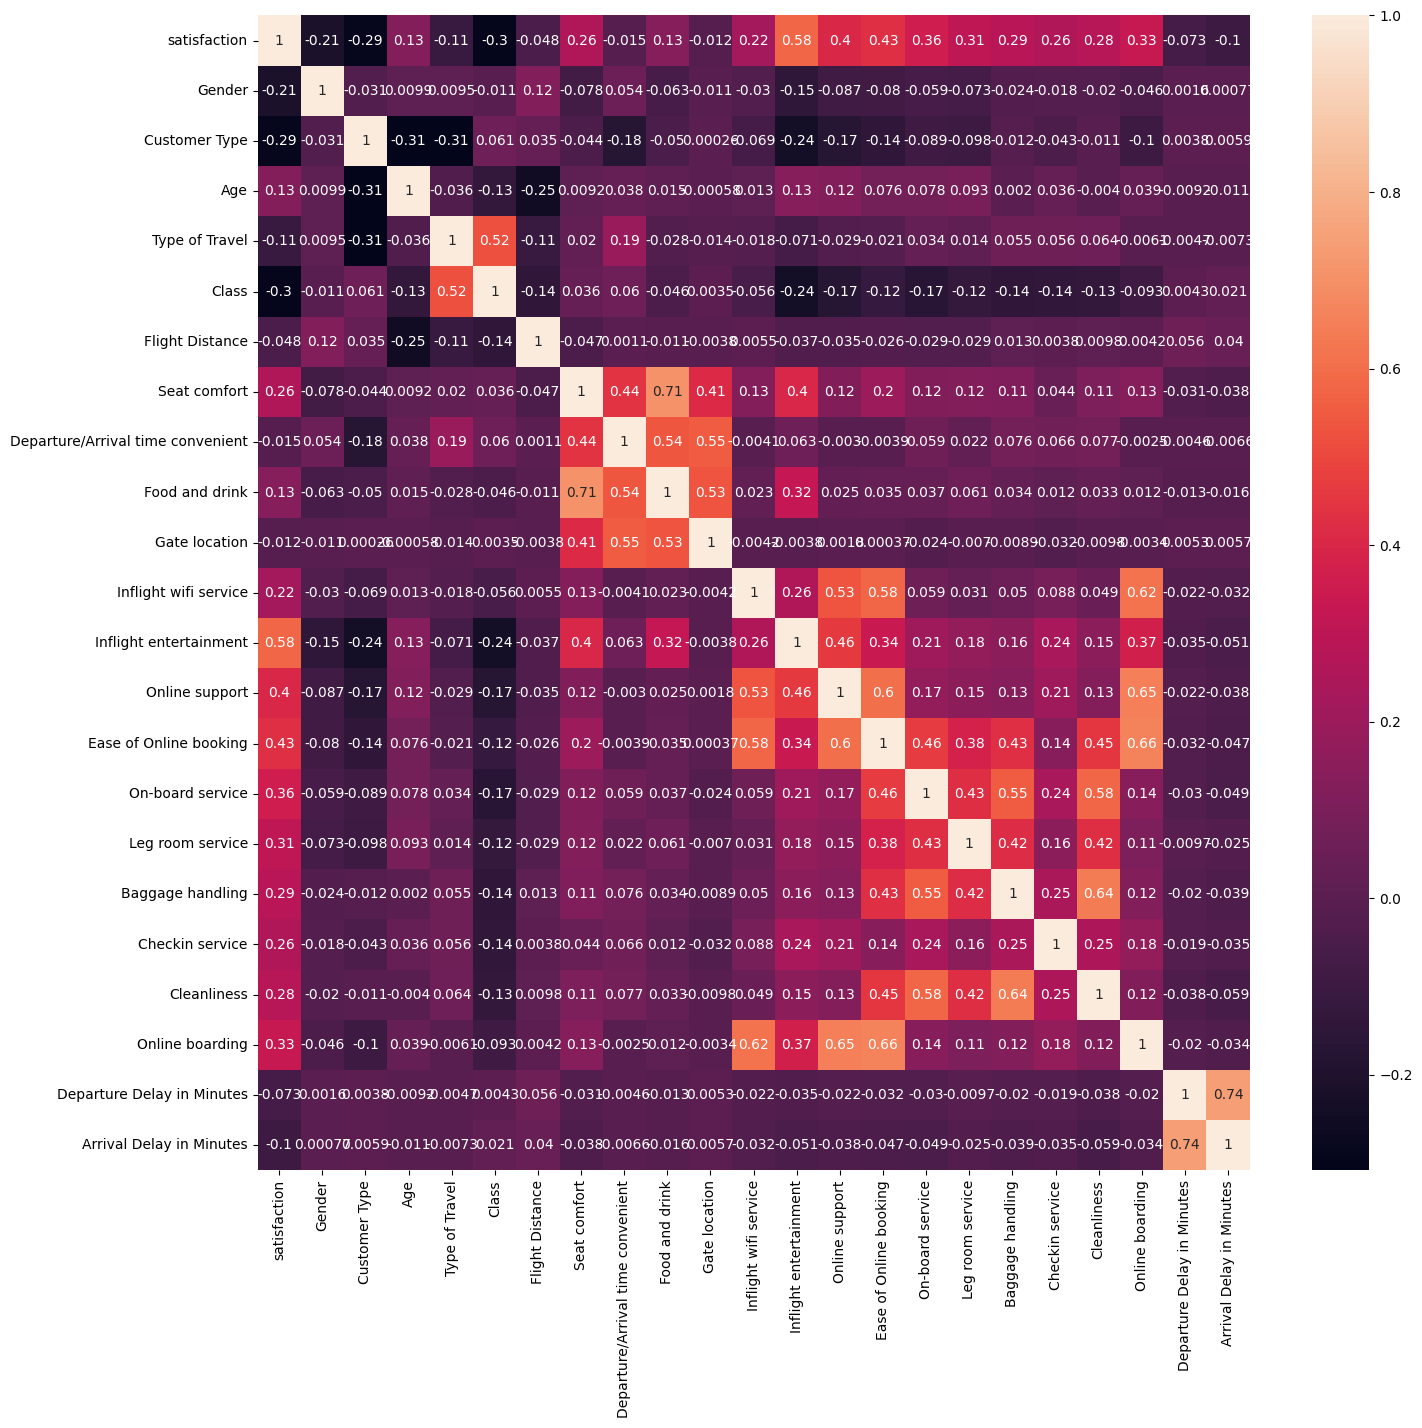

In [38]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(16,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [39]:
df=df.drop('Gate location', axis = 'columns')

In [40]:
df["satisfaction"].value_counts()


1    71087
0    58793
Name: satisfaction, dtype: int64

In [60]:
#sns.pairplot(df,hue='satisfaction')

<Axes: >

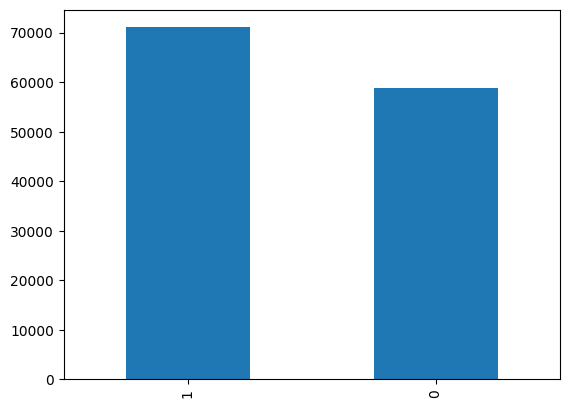

In [42]:
df['satisfaction'].value_counts().plot(kind = 'bar')

In [43]:
X = df.drop(["satisfaction"], axis = 1)
y = df["satisfaction"]

In [44]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(random_state=0)
X_res, y_res = rs.fit_resample(X, y)
print('original dataset shape %s' %Counter(y))
print('After oversampling dataset shape %s' %Counter(y_res))


original dataset shape Counter({1: 71087, 0: 58793})
After oversampling dataset shape Counter({1: 71087, 0: 71087})


<Axes: >

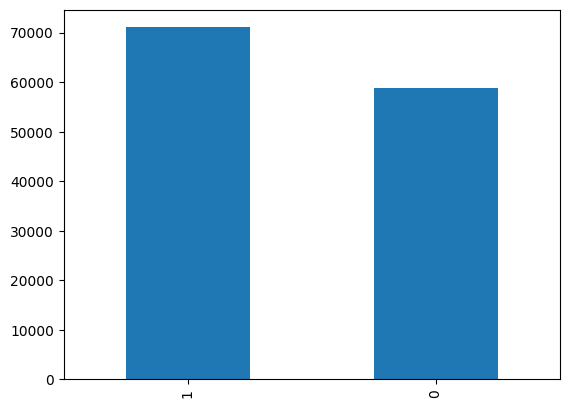

In [45]:
df['satisfaction'].value_counts().plot(kind = 'bar')

In [46]:
df["satisfaction"].value_counts()

1    71087
0    58793
Name: satisfaction, dtype: int64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=11)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(113739, 21) (113739,)
(28435, 21) (28435,)


Machine learning

In [48]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

0.9616669597327238

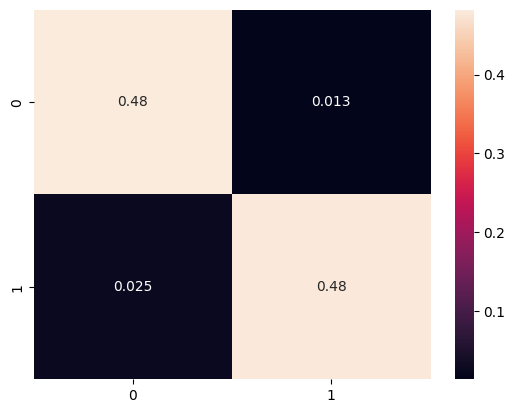

In [49]:
pred1 = rf.predict(x_test)
score = accuracy_score(y_test, pred1)
cn = confusion_matrix(y_test, pred1)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()
score

 Artificial Neural Network

In [50]:
from keras import layers
model= keras.Sequential([
keras.layers.Dense(units=64, input_dim =len(x_train.columns), activation='relu'),
keras.layers.Dense(units=32, activation='relu'),
keras.layers.Dense(units=1, activation='sigmoid')
])

In [51]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [52]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=180, batch_size=32)

Epoch 1/180
3555/3555 [==============================] - 7s 2ms/step - loss: 1.3836 - accuracy: 0.6754 - val_loss: 1.7706 - val_accuracy: 0.6282
Epoch 2/180
3555/3555 [==============================] - 7s 2ms/step - loss: 0.9555 - accuracy: 0.7395 - val_loss: 0.8426 - val_accuracy: 0.7457
Epoch 3/180
3555/3555 [==============================] - 7s 2ms/step - loss: 0.7729 - accuracy: 0.7638 - val_loss: 0.4419 - val_accuracy: 0.8215
Epoch 4/180
3555/3555 [==============================] - 7s 2ms/step - loss: 0.6328 - accuracy: 0.7784 - val_loss: 0.4201 - val_accuracy: 0.8331
Epoch 5/180
3555/3555 [==============================] - 6s 2ms/step - loss: 0.5729 - accuracy: 0.7869 - val_loss: 0.4736 - val_accuracy: 0.8200
Epoch 6/180
3555/3555 [==============================] - 7s 2ms/step - loss: 0.5129 - accuracy: 0.7969 - val_loss: 0.3887 - val_accuracy: 0.8396
Epoch 7/180
3555/3555 [==============================] - 6s 2ms/step - loss: 0.4763 - accuracy: 0.8037 - val_loss: 0.4002 - val_ac

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1408      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [54]:
_, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy= %.2f' % (accuracy*100))

889/889 [==============================] - 1s 1ms/step - loss: 0.1514 - accuracy: 0.9350
Test accuracy= 93.50


In [55]:
pred= model.predict(x_test)
pred = (pred > 0.5)

889/889 [==============================] - 1s 997us/step


[]

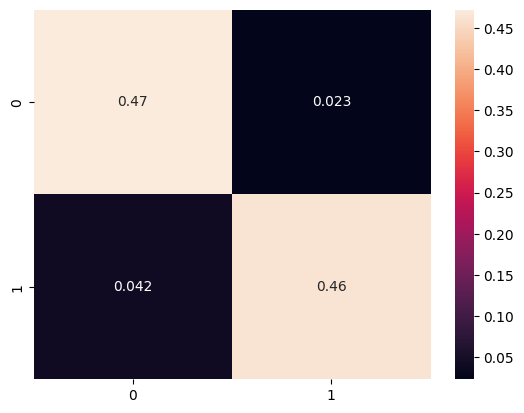

In [56]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, pred)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     14087
           1       0.95      0.92      0.93     14348

    accuracy                           0.93     28435
   macro avg       0.94      0.94      0.93     28435
weighted avg       0.94      0.93      0.93     28435



In [58]:
import pickle 
pickle.dump(model,open('model2.pk1','wb'))